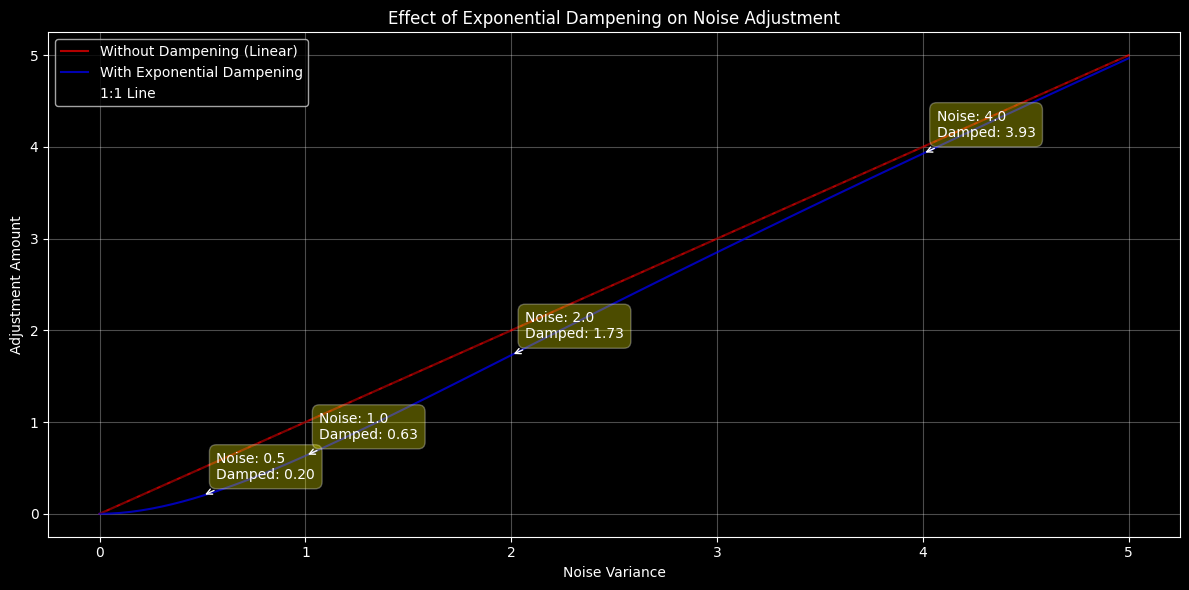


Practical Example of Threshold Adjustment:
Base threshold: 1.0

Noise Level | Raw Adjustment | Dampened Adjustment | Final Threshold
-----------------------------------------------------------------
       0.1 |          0.10 |               0.01 |           1.01
       0.5 |          0.50 |               0.20 |           1.20
       1.0 |          1.00 |               0.63 |           1.63
       2.0 |          2.00 |               1.73 |           2.73
       4.0 |          4.00 |               3.93 |           4.93

Interactive Example:
Noise variance:  0.1 -> Dampened adjustment: 0.01 (Reduction: 90.5%)
Noise variance:  1.0 -> Dampened adjustment: 0.63 (Reduction: 36.8%)
Noise variance:  5.0 -> Dampened adjustment: 4.97 (Reduction:  0.7%)
Noise variance: 10.0 -> Dampened adjustment: 10.00 (Reduction:  0.0%)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def demonstrate_dampening():
    """
    Demonstrate how exponential dampening works with different noise levels
    """
    # Create array of noise variance values
    noise_variances = np.linspace(0, 5, 100)  # Range of noise variances
    
    # Calculate adjustments with and without dampening
    raw_adjustments = noise_variances  # Linear adjustment
    damped_adjustments = noise_variances * (1 - np.exp(-noise_variances))  # Dampened adjustment
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plot both adjustment types
    plt.plot(noise_variances, raw_adjustments, 'r-', 
             label='Without Dampening (Linear)', alpha=0.7)
    plt.plot(noise_variances, damped_adjustments, 'b-', 
             label='With Exponential Dampening', alpha=0.7)
    
    # Add reference points
    plt.plot([0, 5], [0, 5], 'k--', alpha=0.3, label='1:1 Line')
    
    # Annotate important points
    for noise_level in [0.5, 1.0, 2.0, 4.0]:
        raw_adj = noise_level
        damped_adj = noise_level * (1 - np.exp(-noise_level))
        plt.annotate(
            f'Noise: {noise_level:.1f}\nDamped: {damped_adj:.2f}',
            xy=(noise_level, damped_adj),
            xytext=(10, 10),
            textcoords='offset points',
            ha='left',
            va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
        )
    
    plt.xlabel('Noise Variance')
    plt.ylabel('Adjustment Amount')
    plt.title('Effect of Exponential Dampening on Noise Adjustment')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def practical_example():
    """
    Show practical application with threshold adjustment
    """
    # Example data
    base_threshold = 1.0
    noise_levels = [0.1, 0.5, 1.0, 2.0, 4.0]
    
    print("\nPractical Example of Threshold Adjustment:")
    print(f"Base threshold: {base_threshold}")
    print("\nNoise Level | Raw Adjustment | Dampened Adjustment | Final Threshold")
    print("-" * 65)
    
    for noise in noise_levels:
        # Calculate adjustments
        raw_adj = noise
        damped_adj = noise * (1 - np.exp(-noise))
        final_threshold = base_threshold + damped_adj
        
        print(f"{noise:10.1f} | {raw_adj:13.2f} | {damped_adj:18.2f} | {final_threshold:14.2f}")

def interactive_dampening(noise_variance: float) -> float:
    """
    Calculate dampened adjustment for a given noise variance
    
    Args:
        noise_variance: Variance of the noise
        
    Returns:
        Dampened adjustment value
    """
    return noise_variance * (1 - np.exp(-noise_variance))

# Example usage
if __name__ == "__main__":
    # Show visualization
    demonstrate_dampening()
    
    # Show practical example
    practical_example()
    
    # Interactive example
    print("\nInteractive Example:")
    test_variances = [0.1, 1.0, 5.0, 10.0]
    for var in test_variances:
        dampened = interactive_dampening(var)
        reduction = (var - dampened) / var * 100
        print(f"Noise variance: {var:4.1f} -> Dampened adjustment: {dampened:4.2f} "
              f"(Reduction: {reduction:4.1f}%)")